# Standard Reservoir Computer diagram 2 (forecasting)


In [1]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib import font_manager
import numpy    as np
import networkx as nx
import matplotlib.pyplot as plt
import math     as math
import time     as time

#######################################################################
# E N V I R O N M E N T   S E T   U P
#######################################################################
#---------------------------------------------------------------------#
# To compute elapsed time
#---------------------------------------------------------------------#
start_time = time.time()

In [2]:
im = Image.new('RGB',(805, 450),'white')
draw = ImageDraw.Draw(im)


In [3]:
# comment these lines when development is over
#draw.rectangle((0, 0, 804, 449), fill='white', outline='black')
#display(im)

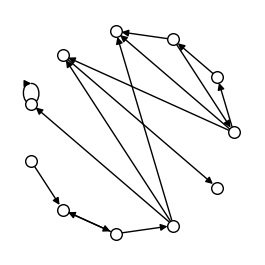

In [4]:
fig = plt.figure(figsize=(2.75,2.75))
ax = plt.subplot(111)
#ax.set_title('Graph - Shapes', fontsize=10)

graph = nx.DiGraph()
graph.add_edges_from([("0", "2"),("2", "3"),("3","4"),("0","4"),("3","0"),("0","7"),("1","1"),
                      ("5", "6"),("6", "9"),("9","6"),("9","A"),("A","7"),("7","8"),("A","1"),
                      ("A", "4")])
nx.draw_circular(graph, with_labels=False, font_weight='normal',node_color = 'white',
                 edgecolors='black',node_size=70, arrowsize=10)

plt.tight_layout()
# comment show if you don't want an empty image
#plt.show()
plt.savefig("reservoir_network_2.png", format="PNG",transparent=True)

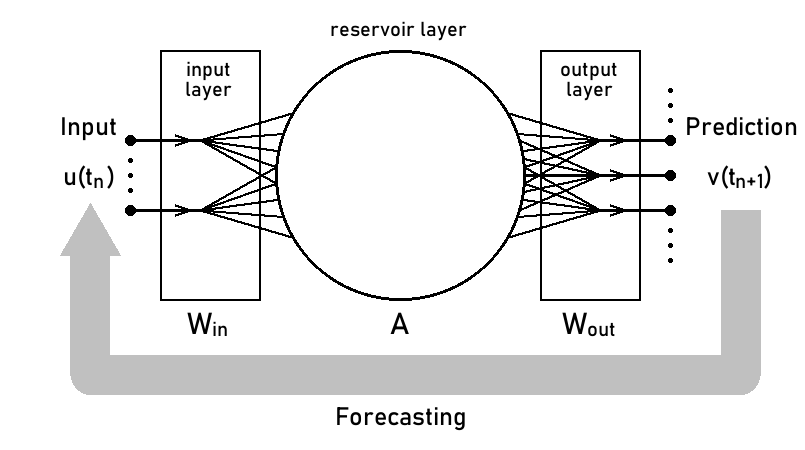

In [5]:
dx,dy = 100,0 # relocation coords.

x,y,a,b = 110+dx,175+dy,100,250
draw.rectangle((x-a/2, y-b/2, x+a/2, y+b/2), fill='white', outline='black', width=2)

x,y,a,b = 490+dx,175+dy,100,250
draw.rectangle((x-a/2, y-b/2, x+a/2, y+b/2), fill='white', outline='black', width=2)

font_m = font_manager.FontProperties(family='Bahnschrift', weight='regular')
file = font_manager.findfont(font_m)
font = ImageFont.truetype(file, 20)

text = "reservoir layer"
draw.text((230+dx, 20+dy), text, 'black', font=font, align ="center") 

text = "input\nlayer"
draw.text((85+dx, 60+dy), text, 'black', font=font, align ="center") 

text = "output\nlayer"
draw.text((460+dx, 60+dy), text, 'black', font=font, align ="center") 

for i in range(3):
    x,y,r = 30+dx,160+dy+15*i,2 # big point
    draw.ellipse((x-r, y-r, x+r, y+r), fill='black')

for i in range(2):
    x,y,r = 30+dx,140+dy+70*i,5 # big point
    draw.ellipse((x-r, y-r, x+r, y+r), fill='black')
    draw.line((x,y,x+70,y),width=3,fill='black')
    
    draw.line((x+60,y,x+45,y+5),width=3,fill='black')
    draw.line((x+60,y,x+45,y-5),width=3,fill='black')
    
    xa,ya,xb,yb = x+70,y,355+dx,65+dy
    for j in range(5):
        draw.line((xa,ya,xb,yb+j*55),width=3,fill='black')
        
#

for i in range(3):
    x,y,r = 570+dx,140+dy+35*i,5 # big point
    draw.ellipse((x-r, y-r, x+r, y+r), fill='black')
    draw.line((x,y,x-70,y),width=3,fill='black')

    draw.line((x-45,y,x-60,y+5),width=3,fill='black')
    draw.line((x-45,y,x-60,y-5),width=3,fill='black')
    
    xa,ya,xb,yb = x-70,y,245+dx,65+dy
    for j in range(5):
        draw.line((xa,ya,xb,yb+j*55),width=3,fill='black')

for i in range(3):
    x,y,r = 570+dx,90+dy+15*i,2 # big point
    draw.ellipse((x-r, y-r, x+r, y+r), fill='black')
    
for i in range(3):
    x,y,r = 570+dx,230+dy+15*i,2 # big point
    draw.ellipse((x-r, y-r, x+r, y+r), fill='black')
    
#

x,y,r = 300+dx,175+dy,125 # circle
draw.ellipse((x-r, y-r, x+r, y+r), fill='white', outline='black', width=3)

#

font = ImageFont.truetype(file, 30)
text = "A"
draw.text((290+dx, 310+dy), text, 'black', font=font, align ="center") 

text = "W"
draw.text((87+dx, 310+dy), text, 'black', font=font, align ="center") 

text = "W"
draw.text((462+dx, 310+dy), text, 'black', font=font, align ="center") 

font = ImageFont.truetype(file, 20)

text = "in"
draw.text((112+dx, 320+dy), text, 'black', font=font, align ="center") 

text = "out"
draw.text((487+dx, 320+dy), text, 'black', font=font, align ="center") 

font = ImageFont.truetype(file, 25)

text = "Input"
draw.text((-40+dx, 115+dy), text, 'black', font=font, align ="center") 

text = "Prediction"
draw.text((585+dx, 115+dy), text, 'black', font=font, align ="center") 

text = "u(t  )"
draw.text((-37+dx, 165+dy), text, 'black', font=font, align ="center") 

text = "v(t    )"
draw.text((607+dx, 165+dy), text, 'black', font=font, align ="center") 

font = ImageFont.truetype(file, 20)

text = "n"
draw.text((-7+dx, 172+dy), text, 'black', font=font, align ="center") 

text = "n+1"
draw.text((635+dx, 172+dy), text, 'black', font=font, align ="center") 

font = ImageFont.truetype(file, 25)

text = "Forecasting"
draw.text((235+dx, 405+dy), text, 'black', font=font, align ="center") 

#

x,y = 640+dx,210+dy
line_points = [(x, y), (x,y+165), (x-650,y+165), (x-650,y+30)]
draw.line(line_points, width=40, fill='silver', joint='curve')

x,y,r = -40+dx,255+dy,30
draw.polygon([(x,y), (x+r, y-math.sqrt(3)*r),(x+2*r, y)], fill = 'silver')
#sqrt(3) * side/ 2

display(im)
im.save('reservoir_computer_background_2.png', quality=95)

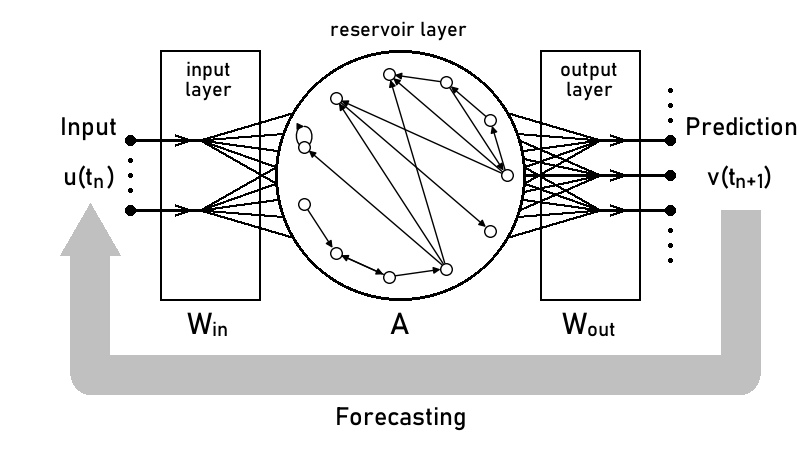

In [6]:
# Overlap images

background = Image.open("reservoir_computer_background_2.png")
foreground = Image.open("reservoir_network_2.png")

background.paste(foreground, (168+dx, 38+dy), foreground)
display(background)
background.save('reservoir_computer_forecasting.png', quality=95)


In [7]:
#---------------------------------------------------------------------#---------------------------------------------------------------------#
# Elapsed time
#---------------------------------------------------------------------#
print(f'\nElapsed time {time.time() - start_time:6.2e} s')


Elapsed time 5.50e-01 s
